### CLUSTERING ANALYSIS 

#### Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


##### Understanding and Implementing K-Means and DBSCAN Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from scipy import stats

### Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


#### Datasets :

In [23]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name=1)
df.shape

(3999, 12)

#### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

In [48]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [50]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [51]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['ID#',
 'Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

In [52]:
data = df[numeric_cols].copy()

In [53]:
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data_imputed.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,2.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,3.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,4.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,5.0,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0


In [54]:
def remove_outliers_iqr(df_in, cols=None, factor=1.5):
    df_temp = df_in.copy()
    if cols is None:
        cols = df_temp.columns
    mask = np.ones(len(df_temp), dtype=bool)
    for c in cols:
        Q1 = df_temp[c].quantile(0.25)
        Q3 = df_temp[c].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask = mask & (df_temp[c] >= lower) & (df_temp[c] <= upper)
    return df_temp[mask]

In [55]:
data_to_scale = data_imputed


In [56]:
scaler = RobustScaler()   
scaler

RobustScaler()

In [57]:
data_scaled = pd.DataFrame(scaler.fit_transform(data_to_scale), columns=data_to_scale.columns, index=data_to_scale.index)
data_scaled.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.002488,-0.202419,0.0,0.0,0.0,0.0,-0.310281,-0.785714,0.000000,0.0,0.839185,0.0
1,-1.001990,-0.322877,0.0,0.0,0.0,0.0,-0.308463,-0.714286,0.000000,0.0,0.829938,0.0
2,-1.001493,-0.023593,0.0,0.0,0.0,0.0,-0.135163,-0.571429,0.000000,0.0,0.849010,0.0
3,-1.000995,-0.383356,0.0,0.0,0.0,0.0,-0.295825,-0.785714,0.000000,0.0,0.825314,0.0
4,-1.000498,0.739816,0.0,1.5,0.0,0.0,1.602137,1.000000,6.678457,4.0,0.820402,1.0


In [58]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,-0.000587,0.577495,-1.002488,-0.500249,0.0,0.499751,0.997512
Balance,3999.0,0.412910,1.364110,-0.583365,-0.332575,0.0,0.667425,22.493499
Qual_miles,3999.0,144.114529,773.663804,0.000000,0.000000,0.0,0.000000,11148.000000
cc1_miles,3999.0,0.529757,0.688460,0.000000,0.000000,0.0,1.000000,2.000000
cc2_miles,3999.0,0.014504,0.147650,0.000000,0.000000,0.0,0.000000,2.000000
cc3_miles,3999.0,0.012253,0.195241,0.000000,0.000000,0.0,0.000000,4.000000
Bonus_miles,3999.0,0.442289,1.070973,-0.317997,-0.262566,0.0,0.737434,11.375091
Bonus_trans,3999.0,-0.028436,0.685986,-0.857143,-0.642857,0.0,0.357143,5.285714
Flight_miles_12mo,3999.0,1.479279,4.502280,0.000000,0.000000,0.0,1.000000,99.090032
Flight_trans_12,3999.0,1.373593,3.793172,0.000000,0.000000,0.0,1.000000,53.000000


##### 3.	Use multiple visualizations to understand the hidden patterns in the dataset

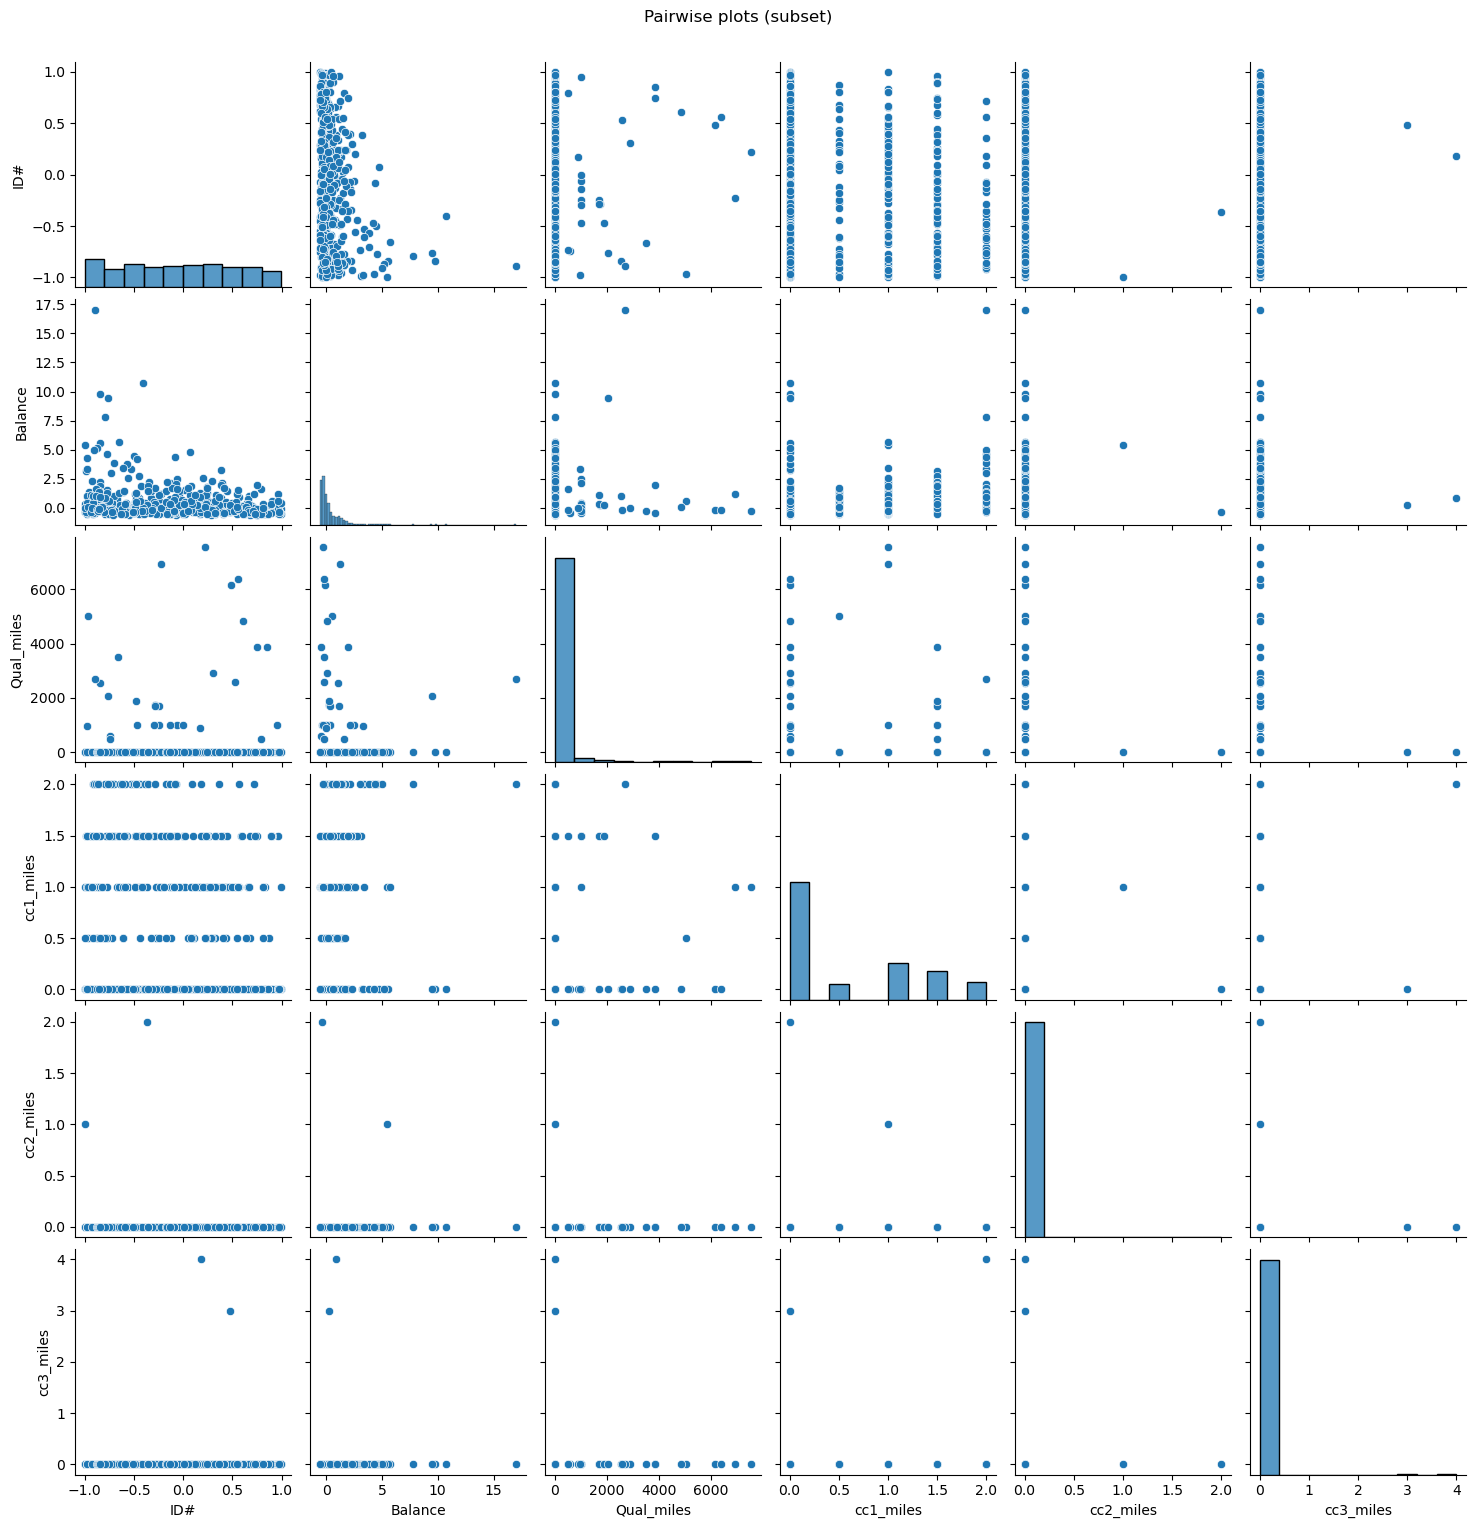

In [59]:
sample_cols = data_scaled.columns[:6]  
sns.pairplot(data_scaled[sample_cols].sample(min(500, len(data_scaled)), random_state=42))
plt.suptitle("Pairwise plots (subset)", y=1.02)
plt.show()

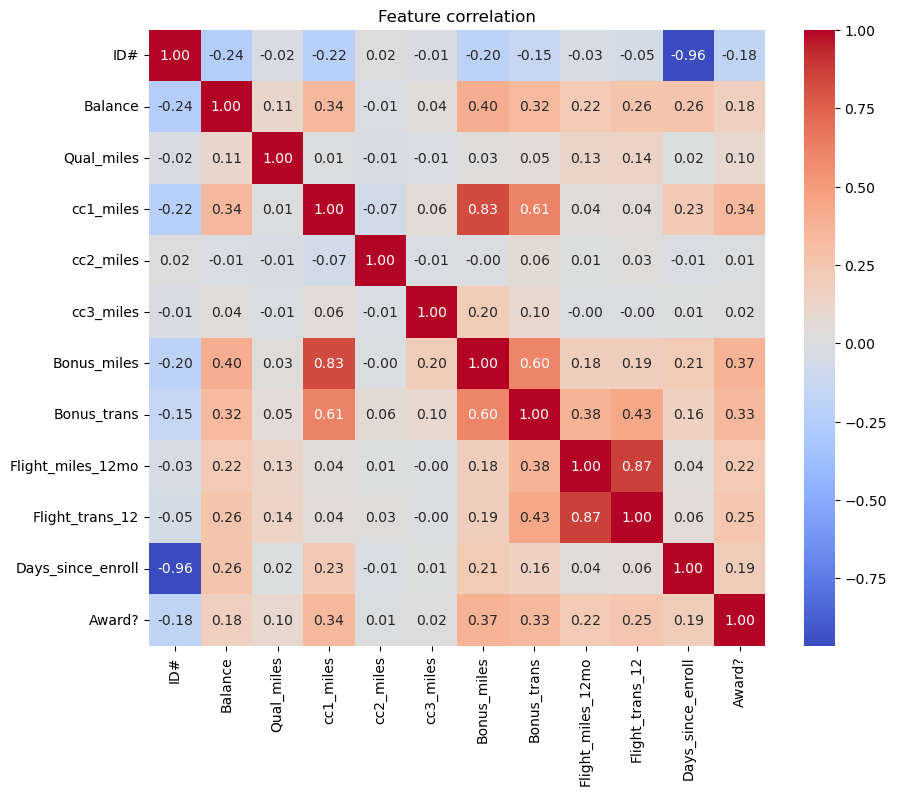

In [60]:
corr = data_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature correlation")
plt.show()

In [61]:
pca = PCA(n_components=2, random_state=42)
pca_2d = pca.fit_transform(data_scaled)
pca_2d

array([[-1.44116696e+02, -1.96408883e+00],
       [-1.44116716e+02, -1.96755126e+00],
       [-1.44116644e+02, -1.93568577e+00],
       ...,
       [-1.44116491e+02, -1.85032014e+00],
       [-1.44114784e+02, -9.07951977e-02],
       [-1.44116815e+02, -2.00660729e+00]])

In [62]:
pca.explained_variance_ratio_

array([9.99934943e-01, 5.36029488e-05])

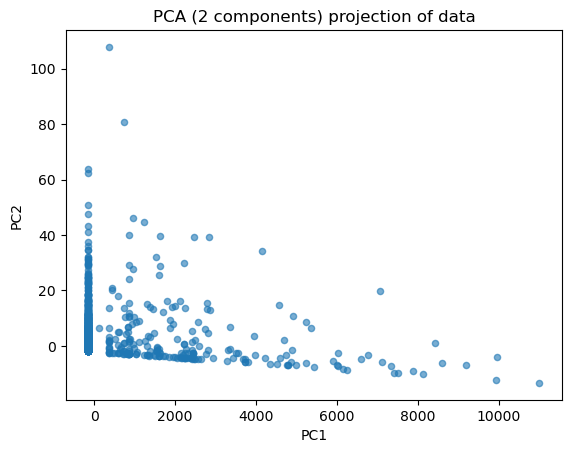

In [63]:
plt.scatter(pca_2d[:,0], pca_2d[:,1], s=20, alpha=0.6)
plt.title("PCA (2 components) projection of data")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

#### Implementing Clustering Algorithms:
•	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
inertias = []
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    sil = silhouette_score(data_scaled, labels)
    sil_scores.append(sil)

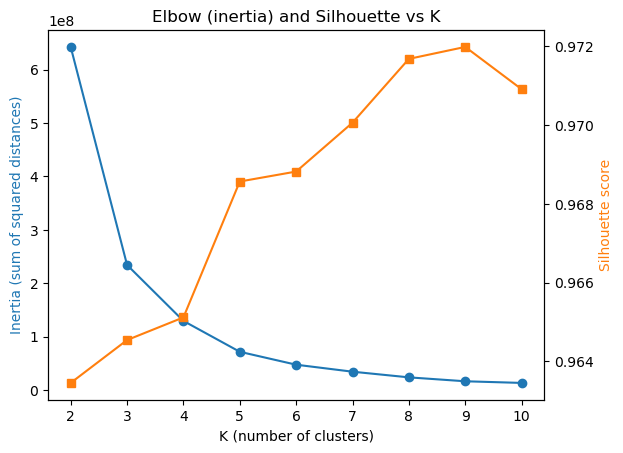

In [67]:
fig, ax1 = plt.subplots()
ax1.plot(K_range, inertias, marker='o')
ax1.set_xlabel("K (number of clusters)")
ax1.set_ylabel("Inertia (sum of squared distances)", color='tab:blue')
ax2 = ax1.twinx()
ax2.plot(K_range, sil_scores, marker='s', color='tab:orange')
ax2.set_ylabel("Silhouette score", color='tab:orange')
plt.title("Elbow (inertia) and Silhouette vs K")
plt.show()

In [68]:
K_best = K_range[int(np.argmax(sil_scores))]
K_best

9

In [70]:
kmeans_final = KMeans(n_clusters=K_best, random_state=42, n_init=50)
k_labels = kmeans_final.fit_predict(data_scaled)

In [71]:
pd.Series(k_labels).value_counts()

0    3774
3      78
2      51
7      42
5      17
4      16
8       9
1       8
6       4
Name: count, dtype: int64

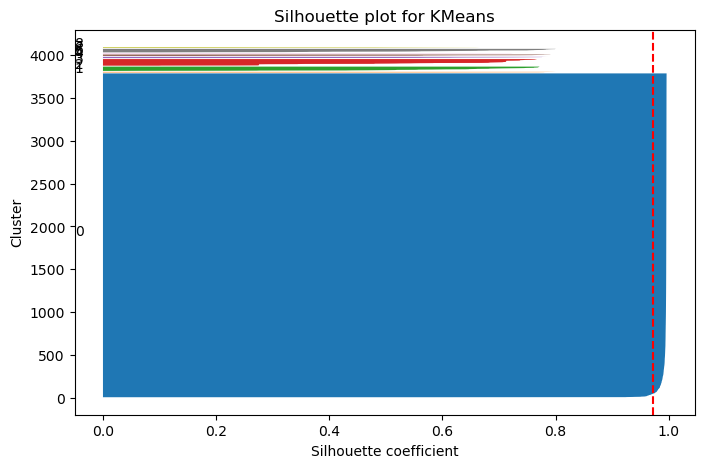

In [72]:
sil_vals = silhouette_samples(data_scaled, k_labels)
plt.figure(figsize=(8,5))
y_lower = 10
for i in range(K_best):
    ith_cluster_sil_vals = sil_vals[k_labels == i]
    ith_cluster_sil_vals.sort()
    size_cluster_i = ith_cluster_sil_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_vals)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette plot for KMeans")
plt.axvline(x=silhouette_score(data_scaled, k_labels), color="red", linestyle="--")
plt.show()

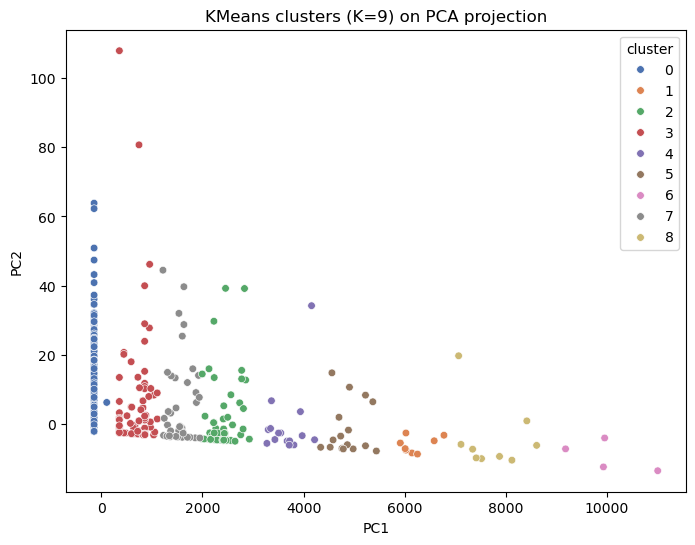

In [73]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("deep", n_colors=len(np.unique(k_labels)))
sns.scatterplot(x=pca_2d[:,0], y=pca_2d[:,1], hue=k_labels, palette=palette, legend='full', s=30)
plt.title(f"KMeans clusters (K={K_best}) on PCA projection")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title="cluster")
plt.show()

In [75]:
cluster_summary = pd.DataFrame(data_imputed).loc[data_scaled.index].copy()
cluster_summary['kmeans_cluster'] = k_labels
summary = cluster_summary.groupby('kmeans_cluster').mean().T
display(summary)

kmeans_cluster,0,1,2,3,4,5,6,7,8
ID#,2023.053789,1912.625,1985.000000,1798.974359,2097.7500,2238.882353,1489.50,1719.428571,1733.666667
Balance,70038.123741,128227.125,154176.176471,120222.730769,115632.8125,101587.000000,71610.25,156569.357143,144688.555556
Qual_miles,0.066243,6359.375,2545.352941,854.923077,3812.6875,5006.235294,10161.25,1694.476190,7863.333333
cc1_miles,2.051934,2.000,2.039216,2.269231,2.1250,2.235294,2.50,2.357143,1.555556
cc2_miles,1.014838,1.000,1.000000,1.025641,1.0000,1.000000,1.00,1.000000,1.000000
cc3_miles,1.012454,1.000,1.000000,1.025641,1.0000,1.000000,1.00,1.000000,1.000000
Bonus_miles,16728.415739,22561.625,21198.490196,26722.833333,20694.9375,21972.764706,11799.75,29251.428571,11420.777778
Bonus_trans,11.365660,10.625,13.862745,17.384615,13.8750,13.941176,15.75,17.547619,10.555556
Flight_miles_12mo,384.838368,590.875,1486.352941,2167.948718,1145.0000,1242.882353,700.00,1987.190476,1337.888889
Flight_trans_12,1.146794,1.625,4.509804,6.294872,3.8125,3.588235,2.25,6.309524,3.888889


#### Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


In [76]:
def plot_k_distance(X, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    # distances to k-th nearest neighbor
    k_distances = np.sort(distances[:, k-1])
    plt.plot(k_distances)
    plt.ylabel(f"{k}th nearest neighbor distance")
    plt.xlabel("Points sorted by distance")
    plt.title(f"k-distance plot (k={k})")
    plt.grid(True)
    plt.show()

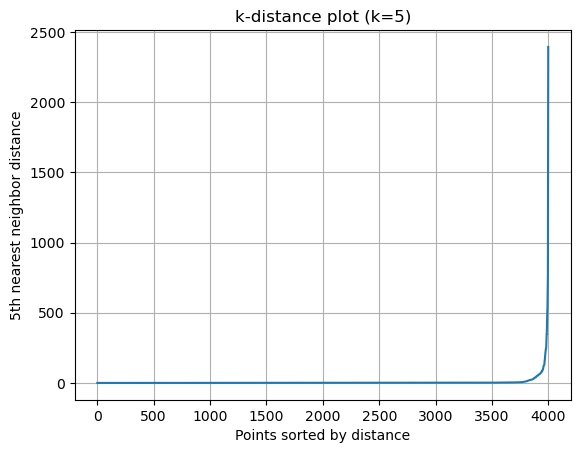

In [77]:
plot_k_distance(data_scaled.values, k=5)


In [81]:
eps_values = np.linspace(0.1, 2.0, 20) 
min_samples_values = [3, 5, 7, 10]
db_results = []


for min_s in min_samples_values:
    best = None
    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(data_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        # require at least 2 clusters to compute silhouette
        if n_clusters >= 2:
            try:
                sil = silhouette_score(data_scaled, labels)
            except Exception:
                sil = np.nan
        else:
            sil = np.nan
        db_results.append((min_s, eps, n_clusters, sil))
        # keep best by silhouette for this min_s
        if best is None or (not np.isnan(sil) and sil > best[3]):
            best = (min_s, eps, n_clusters, sil)
    print(f"Best for min_samples={min_s}: eps={best[1]:.3f}, clusters={best[2]}, silhouette={best[3]:.4f}")

Best for min_samples=3: eps=1.400, clusters=11, silhouette=0.2542
Best for min_samples=5: eps=2.000, clusters=2, silhouette=0.5961
Best for min_samples=7: eps=1.700, clusters=2, silhouette=0.5387
Best for min_samples=10: eps=1.800, clusters=3, silhouette=0.5130


In [82]:
db_df = pd.DataFrame(db_results, columns=["min_samples", "eps", "n_clusters", "silhouette"])
display(db_df.sort_values(["silhouette"], ascending=False).head(10))

,min_samples,eps,n_clusters,silhouette
39,5,2.0,2,0.596076
56,7,1.7,2,0.538706
77,10,1.8,3,0.512995
76,10,1.7,2,0.507625
55,7,1.6,3,0.503835
34,5,1.5,2,0.494117
54,7,1.5,2,0.485494
59,7,2.0,2,0.482515
36,5,1.7,2,0.475391
57,7,1.8,2,0.472754


In [83]:
db_best_row = db_df.loc[db_df['silhouette'].idxmax()]
eps_best = float(db_best_row['eps'])
min_s_best = int(db_best_row['min_samples'])

In [84]:
db_best_row.to_dict()

{'min_samples': 5.0,
 'eps': 2.0,
 'n_clusters': 2.0,
 'silhouette': 0.5960757507642644}

In [85]:
dbscan = DBSCAN(eps=eps_best, min_samples=min_s_best)
db_labels = dbscan.fit_predict(data_scaled)

In [86]:
pd.Series(db_labels).value_counts()

 0    3549
-1     444
 1       6
Name: count, dtype: int64

#### Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


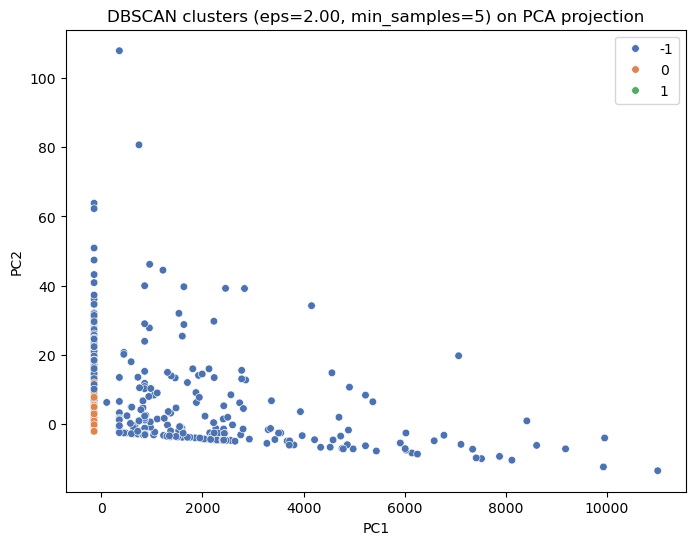

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_2d[:,0], y=pca_2d[:,1], hue=db_labels, palette="deep", legend='full', s=30)
plt.title(f"DBSCAN clusters (eps={eps_best:.2f}, min_samples={min_s_best}) on PCA projection")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


#### Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [90]:
n_clusters_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)
if n_clusters_db >= 2:
    sil_db = silhouette_score(data_scaled, db_labels)
    print("DBSCAN silhouette score:", sil_db)
else:
    print("DBSCAN produced fewer than 2 clusters; silhouette not meaningful.")

DBSCAN silhouette score: 0.5960757507642644


In [91]:
df_db = pd.DataFrame(data_imputed).loc[data_scaled.index].copy()
df_db['dbscan_cluster'] = db_labels
df_db[df_db['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean().T

dbscan_cluster,0,1
ID#,2040.223443,2476.000000
Balance,60844.860242,31014.666667
Qual_miles,0.000000,0.000000
cc1_miles,2.008735,1.333333
cc2_miles,1.013525,1.000000
cc3_miles,1.000845,1.000000
Bonus_miles,14821.581572,7223.500000
Bonus_trans,10.532544,11.166667
Flight_miles_12mo,191.737109,3856.666667
Flight_trans_12,0.612285,5.833333


In [92]:
print("\nSummary:")
print(f"KMeans: chosen K={K_best}, silhouette={silhouette_score(data_scaled, k_labels):.4f}")
if n_clusters_db >= 2:
    print(f"DBSCAN: eps={eps_best:.3f}, min_samples={min_s_best}, clusters={n_clusters_db}, silhouette={sil_db if n_clusters_db>=2 else 'N/A'}")
else:
    print("DBSCAN: less than 2 clusters; consider adjusting parameters.")


Summary:
KMeans: chosen K=9, silhouette=0.9720
DBSCAN: eps=2.000, min_samples=5, clusters=2, silhouette=0.5960757507642644


In [93]:
result_df = df.copy()

In [94]:
result_df = result_df.loc[data_scaled.index]
result_df['kmeans_cluster'] = k_labels
result_df['dbscan_cluster'] = db_labels


In [95]:
result_df.to_csv("data_with_clusters.csv", index=False)

In [96]:
result_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster,dbscan_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
